In [1]:
import numpy as np
from sklearn.svm import SVR
from sklearn import linear_model
import matplotlib.pyplot as plt

In [2]:
# Number of generated data points
num_data = 500
# Rand seed
np.random.seed(0)
# error
error_abs = 0.4

In [3]:
# Generate some data
# Generate features
x = np.random.random(size=[num_data,1])
# Define error
# Here I define error to be either +0.05 and -0.05 with equal probability for clarity
error = [error_abs, -error_abs]
# Generate targets
# The true relations between x and y is y = x 
y = 5 * x.ravel() + np.random.choice(error, size = num_data)

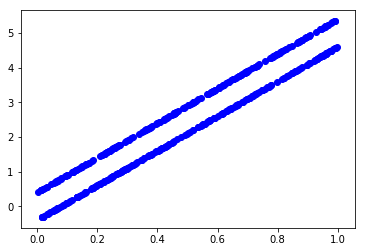

In [4]:
# Plot to have some idea about the data
plt.scatter(x, y, color = 'blue')
plt.show()

In [5]:
# Now let us try to fit these data using ordinary linear regression
linear_regression = linear_model.LinearRegression()
linear_regression.fit(x, y)
print('Coefficients: \n', linear_regression.coef_)

('Coefficients: \n', array([ 5.01746035]))


In [6]:
# Now let us try to fit these data using linear support vector regression
SVR_linear_regression_small_c = SVR(kernel='linear', C = 0.001)
SVR_linear_regression_small_c.fit(x, y)
print('Coefficients: \n', SVR_linear_regression_small_c.coef_)

('Coefficients: \n', array([[ 0.12262323]]))


In [7]:
# Now let us try to fit these data using linear support vector regression
SVR_linear_regression_big_c = SVR(kernel='linear', C = 10)
SVR_linear_regression_big_c.fit(x, y)
print('Coefficients: \n', SVR_linear_regression_big_c.coef_)

('Coefficients: \n', array([[ 4.99999615]]))


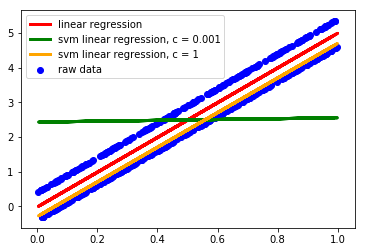

In [8]:
fig, ax = plt.subplots()
ax.scatter(x, y, color = 'blue', label = 'raw data')
ax.plot(x, linear_regression.predict(x), color = 'red', linewidth = 3, label = 'linear regression')
ax.plot(x, SVR_linear_regression_small_c.predict(x), color = 'green', linewidth = 3, label = 'svm linear regression, c = 0.001')
ax.plot(x, SVR_linear_regression_big_c.predict(x), color = 'orange', linewidth = 3, label = 'svm linear regression, c = 1')
ax.legend()
plt.show()
fig.savefig('svr_demo.png', dpi = 300)